# Clustering Crypto

In [17]:
# Initial imports
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
from pathlib import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


### Deliverable 1: Preprocessing the Data for PCA

In [2]:
# Load the crypto_data.csv dataset.
file_path = Path("crypto_data.csv")
df_crypto = pd.read_csv(file_path)
df_crypto.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
# Keep all the cryptocurrencies that are being traded.
df_crypto = df_crypto[df_crypto.IsTrading.eq(True)]
df_crypto.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
# Remove the "IsTrading" column. 
df_crypto = df_crypto.drop(["IsTrading"],axis = 1)
df_crypto.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [5]:
# Remove rows that have at least 1 null value.
df_crypto = df_crypto.dropna(how='any',axis=0) 
df_crypto.head(15)

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
9,LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000
10,DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000
11,XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0
12,ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000


In [6]:
# Check null values
df_crypto.isnull().sum()

Unnamed: 0         0
CoinName           0
Algorithm          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [7]:
# Keep the rows where coins are mined.
df_crypto = df_crypto[df_crypto.TotalCoinsMined > 0]

In [8]:
df_crypto = df_crypto.drop(columns=['Unnamed: 0'])
df_crypto

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [9]:
# Create a new DataFrame that holds only the cryptocurrencies names.
crypto_names = df_crypto.filter(['CoinName'], axis=1)
crypto_names

,CoinName
0,42 Coin
2,404Coin
5,EliteCoin
7,Bitcoin
8,Ethereum
...,...
1238,ZEPHYR
1242,Gapcoin
1245,Beldex
1246,Horizen


In [10]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
df_crypto.drop(columns='CoinName', axis=1, inplace= True)
df_crypto

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [11]:
# Use get_dummies() to create variables for text features.
X = pd.get_dummies(df_crypto, columns=['Algorithm', 'ProofType'])
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Deliverable 2: Reducing Data Dimensions Using PCA

In [12]:
# Standardize the data with StandardScaler().
scaler = StandardScaler()
crypto_scaled_df = scaler.fit_transform(X)

In [13]:
# Using PCA to reduce dimension to three principal components.
pca = PCA(n_components=3)

# Get three principal components for the crypto data.
crypto_pca = pca.fit_transform(crypto_scaled_df)

In [26]:
# Create a DataFrame with the three principal components.
pcs_df = pd.DataFrame(data=crypto_pca, 
                             columns=["PC 1", "PC 2", "PC 3"])
pcs_df.head()

,PC 1,PC 2,PC 3
0,-0.349392,1.081599,-0.285981
1,-0.332836,1.082005,-0.286291
2,2.270897,1.756639,-0.380836
3,-0.143628,-1.361073,0.103665
4,-0.151511,-2.041422,0.223168


### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

C:\Users\yanya\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


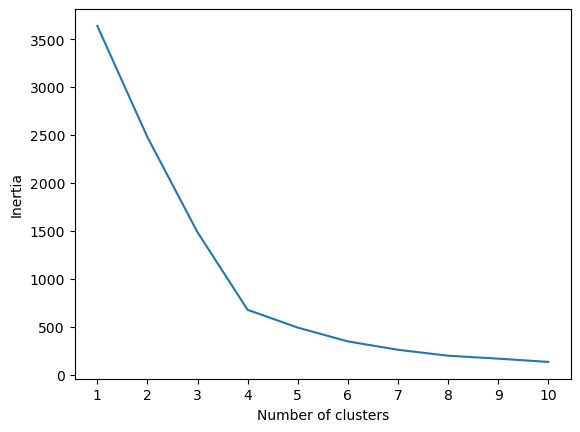

In [27]:
# Create an elbow curve to find the best value for K.
#  Looking for the best K
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values from 1-10
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(pcs_df)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


Running K-Means with `k=4`

In [28]:
# Initialize the K-Means model.
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(pcs_df)

# Predict clusters
predictions = model.predict(pcs_df)
predictions

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,

In [33]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
clustered_df = pd.concat([df_crypto,pcs_df],axis =1, join='inner')

#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
clustered_df["CoinName"] = crypto_names.CoinName

#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
clustered_df["Class"]= model.labels_

# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

ValueError: Length of values (532) does not match length of index (205)

### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

In [34]:
# Creating a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(clustered_df, x="PC 1", y="PC 2", z="PC 3", color="Class", symbol="Class", width=800, 
                    hover_name="CoinName", hover_data=["Algorithm"])
fig.update_layout(legend=dict(x=0, y=1))
fig.show()


ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['Algorithm', 'ProofType', 'TotalCoinsMined', 'TotalCoinSupply', 'PC 1', 'PC 2', 'PC 3', 'CoinName'] but received: Class

In [35]:
# Create a table with tradable cryptocurrencies.
tradable_crypto_table = clustered_df.hvplot.table(columns=['CoinName', 'Algorithm', 'ProofType', 'TotalCoinSupply', 
                                                  'TotalCoinsMined', 'Class'], sortable=True, selectable=True)
tradable_crypto_table

DataError: Supplied data does not contain specified dimensions, the following dimensions were not found: ['Class']

PandasInterface expects tabular data, for more information on supported datatypes see http://holoviews.org/user_guide/Tabular_Datasets.html

In [36]:
# Print the total number of tradable cryptocurrencies.
print(f'the number of tradable cryptocurrencies is {len(clustered_df)} ')

the number of tradable cryptocurrencies is 205 


In [37]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
X_cluster = clustered_df[['TotalCoinSupply', 'TotalCoinsMined']].copy()
X_cluster_scaled = MinMaxScaler().fit_transform(X_cluster)
X_cluster_scaled

array([[1.09375000e-10, 0.00000000e+00],
       [1.38541667e-03, 5.73261824e-03],
       [8.18123087e-01, 1.59069533e-01],
       [5.46875000e-05, 9.73946969e-05],
       [0.00000000e+00, 5.85027630e-04],
       [2.18750000e-04, 3.42479966e-04],
       [5.72916667e-05, 4.90650729e-05],
       [0.00000000e+00, 9.34503042e-05],
       [5.46875000e-04, 6.15861433e-04],
       [5.46875000e-05, 4.01105093e-05],
       [9.37648568e-03, 1.48944271e-02],
       [5.46875000e-02, 6.19678145e-02],
       [5.72916667e-05, 7.00191343e-06],
       [3.25520833e-05, 6.51681401e-05],
       [5.46875000e-05, 3.13379007e-05],
       [9.11458333e-04, 1.38767500e-04],
       [5.20833333e-05, 6.05741516e-05],
       [1.66666667e-04, 6.63115322e-05],
       [4.36681875e-05, 9.85243138e-05],
       [0.00000000e+00, 3.45213672e-03],
       [5.20833333e-03, 9.17196335e-03],
       [1.00000000e+00, 2.49909484e-10],
       [4.42176010e-04, 9.24687783e-04],
       [6.51041667e-04, 7.00511385e-04],
       [2.604166

In [38]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
plot_df = pd.DataFrame(X_cluster_scaled, columns=['TotalCoinSupply', 'TotalCoinsMined'], index=clustered_df.index)

# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
plot_df['CoinName'] = clustered_df.CoinName

# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
plot_df['Class'] = clustered_df.Class

plot_df.head(10)

AttributeError: 'DataFrame' object has no attribute 'Class'

In [39]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".

plot_df.hvplot.scatter(x='TotalCoinsMined', y='TotalCoinSupply', hover_cols='CoinName', by='Class')

DataError: Supplied data does not contain specified dimensions, the following dimensions were not found: ['Class']

PandasInterface expects tabular data, for more information on supported datatypes see http://holoviews.org/user_guide/Tabular_Datasets.html